# Exploring the Best Results
The Logistic Regression model built using features extracted through Tfidf with unigrams and bigrams had the best performance, so we will further explore the results here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import json

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import pickle

In [2]:
infile = open('../SavedFiles/LRtfidf_results.pkl', 'rb')
results = pickle.load(infile)
infile.close

<function BufferedReader.close>

<function BufferedReader.close>

In [3]:
results = results.sort_values('prob_pos')

In [4]:
results.head()

,review_id,business_id,name,text,stars,pos,ypred,prob_pos
144760,fTgxrkoffDQINOMHZD7Yyg,ajwGl90CuCZac3BKWY1ShQ,McDonald's,I feel terrible for rating a fast food restaur...,1.0,0,0,0.000044
216790,QdTRVzPg0uZUH0cZftMrjQ,fI8sXEe2RhxpkS6UxixReQ,Sonic Drive-In,Horrible and will not be going back. We were g...,1.0,0,0,0.000126
214921,EopV2Dg4CH7Ymh5X8n-ZKw,NFaA4MmgnS0u0uWCGGSHMA,KFC,Terrible!! Lady taking our order was so rude a...,1.0,0,0,0.000147
116808,Eqt-DM1ioYUYFCYeAHbGWQ,zDbRhfmrhXdXy1o8uKTrAg,Pei Wei,The Pei Wei at the Summit is the absolute wors...,1.0,0,0,0.000149
131379,NZyRCfIfkWfrct3ixK1-vA,16NS8EICI94IGdn-S0yxkw,McDonald's,Worst McDonald ever tons of people working slo...,1.0,0,0,0.000150


,review_id,business_id,name,text,stars,pos,ypred,prob_pos
144760,fTgxrkoffDQINOMHZD7Yyg,ajwGl90CuCZac3BKWY1ShQ,McDonald's,I feel terrible for rating a fast food restaur...,1.0,0,0,0.000044
216790,QdTRVzPg0uZUH0cZftMrjQ,fI8sXEe2RhxpkS6UxixReQ,Sonic Drive-In,Horrible and will not be going back. We were g...,1.0,0,0,0.000126
214921,EopV2Dg4CH7Ymh5X8n-ZKw,NFaA4MmgnS0u0uWCGGSHMA,KFC,Terrible!! Lady taking our order was so rude a...,1.0,0,0,0.000147
116808,Eqt-DM1ioYUYFCYeAHbGWQ,zDbRhfmrhXdXy1o8uKTrAg,Pei Wei,The Pei Wei at the Summit is the absolute wors...,1.0,0,0,0.000149
131379,NZyRCfIfkWfrct3ixK1-vA,16NS8EICI94IGdn-S0yxkw,McDonald's,Worst McDonald ever tons of people working slo...,1.0,0,0,0.000150


In [5]:
results.tail()

,review_id,business_id,name,text,stars,pos,ypred,prob_pos
164309,8wbwWh0NrdipD6G0U_RNXQ,5Aa43lrbSNCuXHz1Vpt-Ag,Subway,Sammi was an amazing cashier. . She was very n...,5.0,1,1,0.999915
1111,-3W0-0ef3zGQH3-EvGjJ-Q,v1cbdKF5EjgWSwutjzg-WA,Jersey Mike's Subs,Love this place! ! Food is VERY fresh and del...,5.0,1,1,0.999954
191202,5i4CBD51AhDx9udAcCdaQw,WXSsJIO_uGGSxS9qC8x1gQ,The Protein Source,I love this place! Amazing food!! Thank you D...,5.0,1,1,0.999956
50012,4qS-2gUM9MfmywqlP0nApQ,KDdu9HDswaJYExaGDuzRjQ,Vegeway,Amazing place! Food is sooo good! I got the \...,5.0,1,1,0.999960
179375,4a2bJIkTc47zOAcSy8P78w,SUd3IyEN7n5OYEGyt_U5lg,Jefe's Taco Shop,"This is one of the best ""hole in the wall"" spo...",5.0,1,1,0.999963


,review_id,business_id,name,text,stars,pos,ypred,prob_pos
164309,8wbwWh0NrdipD6G0U_RNXQ,5Aa43lrbSNCuXHz1Vpt-Ag,Subway,Sammi was an amazing cashier. . She was very n...,5.0,1,1,0.999915
1111,-3W0-0ef3zGQH3-EvGjJ-Q,v1cbdKF5EjgWSwutjzg-WA,Jersey Mike's Subs,Love this place! ! Food is VERY fresh and del...,5.0,1,1,0.999954
191202,5i4CBD51AhDx9udAcCdaQw,WXSsJIO_uGGSxS9qC8x1gQ,The Protein Source,I love this place! Amazing food!! Thank you D...,5.0,1,1,0.999956
50012,4qS-2gUM9MfmywqlP0nApQ,KDdu9HDswaJYExaGDuzRjQ,Vegeway,Amazing place! Food is sooo good! I got the \...,5.0,1,1,0.999960
179375,4a2bJIkTc47zOAcSy8P78w,SUd3IyEN7n5OYEGyt_U5lg,Jefe's Taco Shop,"This is one of the best ""hole in the wall"" spo...",5.0,1,1,0.999963


## ROC Curve

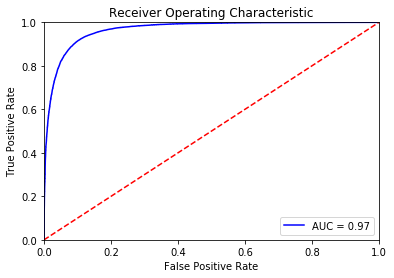

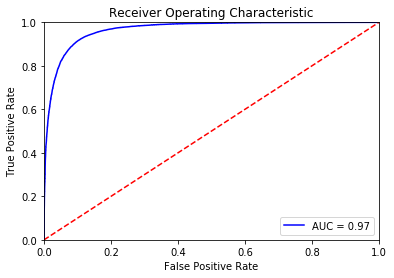

In [6]:
fpr, tpr, threshold = roc_curve(results.pos,  results.prob_pos)

roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC_Curve.png', dpi=300)

In [7]:
#true proportion of positive reviews
sum(results.pos)/len(results.pos)

0.5032231043775949

0.5032231043775949

In [8]:
#predicted proportion of positive reviews
sum(results.ypred)/len(results.ypred)

0.5045159880544832

0.5045159880544832

## Examining Misclassified Reviews

In [9]:
misclassified = results[results.pos != results.ypred]

In [10]:
misclassified.groupby('stars')['stars'].count()

stars
1.0     119
2.0     261
3.0    2215
4.0    1913
5.0     611
Name: stars, dtype: int64

stars
1.0     119
2.0     261
3.0    2215
4.0    1913
5.0     611
Name: stars, dtype: int64

In [11]:
misclassified = misclassified.sort_values('prob_pos')
misclassified

,review_id,business_id,name,text,stars,pos,ypred,prob_pos
80423,hknvE9OWj5lh73iJ9i5f8Q,V2WLiBR3iGaegRAVNjOndA,Panda Express,Today I went to this restaurant and I had such...,4.0,1,0,0.005890
190105,EV700My3CsN0qqYJKVbh4Q,amhrLAizPkzc7dterynUUA,McDonald's,Okay place to eat. The food is what you'd expe...,4.0,1,0,0.006106
48333,4Qe1sLVeS1Jf3LEr8xHulQ,DL7V1_chkWkZtyG4_xNYfw,Pei Wei,Service was TERRIBLE. Last time we ate here we...,4.0,1,0,0.008558
211498,V83UwyWFMHK_OzzZ6YOCzw,kqW_BKO3XCOx8ifbzQsnGA,McDonald's,mcdonald's can do no wrong.,4.0,1,0,0.008725
40971,WjD6NyEllft4ALsrtYLAhw,5n2dA_QqO4c_7pSK0Of6AQ,Fatburger,"Worst fatburger in the whole city, always smel...",5.0,1,0,0.008852
48553,Hac5tJXSG_eXB9guPOaAtg,0iPXuywgu37dDpwLMudACQ,Taco Bell,Kinda rude at the drive through . I asked if t...,4.0,1,0,0.012430
142291,Te3s1ZE7SQinIj-yBOGRNw,TT2bNjvnVNFOanDNYnAffQ,Raising Cane's,Love this place but this last time waited 20 m...,4.0,1,0,0.012665
189503,VOfBz8_drk_5ZLZocEfy7w,GmGvbDABaGvcKe_jIDvq6w,Raising Cane's,Came in today and ordered the caniac combo to ...,4.0,1,0,0.012996
168418,sWJG9C7NQKq9TxHxG97GJg,xHEqgRS_p8ZE8GTgcJc2Hg,Jack in the Box,It's not a bad place. The service is ridiculou...,4.0,1,0,0.013144
196905,hlKLr3V_zVvM6QUzesxnkQ,oUJXPurI_LFTZhRCZcRNcg,Zero Degrees,It was ok. Nothing too special. It was really ...,4.0,1,0,0.014706


,review_id,business_id,name,text,stars,pos,ypred,prob_pos
80423,hknvE9OWj5lh73iJ9i5f8Q,V2WLiBR3iGaegRAVNjOndA,Panda Express,Today I went to this restaurant and I had such...,4.0,1,0,0.005890
190105,EV700My3CsN0qqYJKVbh4Q,amhrLAizPkzc7dterynUUA,McDonald's,Okay place to eat. The food is what you'd expe...,4.0,1,0,0.006106
48333,4Qe1sLVeS1Jf3LEr8xHulQ,DL7V1_chkWkZtyG4_xNYfw,Pei Wei,Service was TERRIBLE. Last time we ate here we...,4.0,1,0,0.008558
211498,V83UwyWFMHK_OzzZ6YOCzw,kqW_BKO3XCOx8ifbzQsnGA,McDonald's,mcdonald's can do no wrong.,4.0,1,0,0.008725
40971,WjD6NyEllft4ALsrtYLAhw,5n2dA_QqO4c_7pSK0Of6AQ,Fatburger,"Worst fatburger in the whole city, always smel...",5.0,1,0,0.008852
48553,Hac5tJXSG_eXB9guPOaAtg,0iPXuywgu37dDpwLMudACQ,Taco Bell,Kinda rude at the drive through . I asked if t...,4.0,1,0,0.012430
142291,Te3s1ZE7SQinIj-yBOGRNw,TT2bNjvnVNFOanDNYnAffQ,Raising Cane's,Love this place but this last time waited 20 m...,4.0,1,0,0.012665
189503,VOfBz8_drk_5ZLZocEfy7w,GmGvbDABaGvcKe_jIDvq6w,Raising Cane's,Came in today and ordered the caniac combo to ...,4.0,1,0,0.012996
168418,sWJG9C7NQKq9TxHxG97GJg,xHEqgRS_p8ZE8GTgcJc2Hg,Jack in the Box,It's not a bad place. The service is ridiculou...,4.0,1,0,0.013144
196905,hlKLr3V_zVvM6QUzesxnkQ,oUJXPurI_LFTZhRCZcRNcg,Zero Degrees,It was ok. Nothing too special. It was really ...,4.0,1,0,0.014706


In [12]:
misclassified['text'].tail(1)

128408    I was very pleased with my call in/carryout or...
Name: text, dtype: object

128408    I was very pleased with my call in/carryout or...
Name: text, dtype: object

In [13]:
misclassified[misclassified.stars == 5]

,review_id,business_id,name,text,stars,pos,ypred,prob_pos
40971,WjD6NyEllft4ALsrtYLAhw,5n2dA_QqO4c_7pSK0Of6AQ,Fatburger,"Worst fatburger in the whole city, always smel...",5.0,1,0,0.008852
192424,-k22S_NmakYyEEVVdT1BeQ,WXSsJIO_uGGSxS9qC8x1gQ,The Protein Source,I like the Protein Source and find the staff v...,5.0,1,0,0.028189
29419,9qd6gvw5-8dAcl4gPw7_pg,2CNaSduqZIsCRuNvdO_TAQ,Chipotle Mexican Grill,I was eating chipotle bowl that I ordered and ...,5.0,1,0,0.034796
187285,3srsRXksTTD5WIizxvT9gw,Wcuo6YmYj3xhCso5sMQcOw,Blaze Fast-Fire'd Pizza,UPDATE: 1/19/17\n\nAfter I left my original re...,5.0,1,0,0.036144
149786,SKoNJI4RimqQCeOW1UtDKQ,147BvO6Fm58E-kYoXTZfPw,z-teca Gourmet Burritos,Most stores told us that they got ripped off f...,5.0,1,0,0.039642
133289,GMFaCqMbpKpDSQ6QEFZO5w,KTPRYqiFdLowAUEAnN7e3g,Burgatory,After driving for over an hour and waiting ano...,5.0,1,0,0.040638
132899,JkDEelmC5AM9jBtkL1_mWA,edzyeTLeOS_Rwla6pfXWQw,Harvey's,One could customize the burgers and add whiche...,5.0,1,0,0.045135
93915,JKf06jzE8Up99ZuP_k1t-g,fQ1sYWuXtVVOFWhrC9bTrA,Culver's,On a recent trip I had a terrible hamburger at...,5.0,1,0,0.047157
42836,bhzAfjjLJkW3Dd7c1L5LVw,B3omTXI--0eiBC7nCv_WXg,Farm Basket,I have been coming here my entire 21 years of ...,5.0,1,0,0.053165
111482,1erT0CuIPO6jn_B07NS5cw,dlcGwaX1F88eFbAP_YYE5A,Firehouse Subs,Firehouse! Why did you have to go and ruin a g...,5.0,1,0,0.053356


,review_id,business_id,name,text,stars,pos,ypred,prob_pos
40971,WjD6NyEllft4ALsrtYLAhw,5n2dA_QqO4c_7pSK0Of6AQ,Fatburger,"Worst fatburger in the whole city, always smel...",5.0,1,0,0.008852
192424,-k22S_NmakYyEEVVdT1BeQ,WXSsJIO_uGGSxS9qC8x1gQ,The Protein Source,I like the Protein Source and find the staff v...,5.0,1,0,0.028189
29419,9qd6gvw5-8dAcl4gPw7_pg,2CNaSduqZIsCRuNvdO_TAQ,Chipotle Mexican Grill,I was eating chipotle bowl that I ordered and ...,5.0,1,0,0.034796
187285,3srsRXksTTD5WIizxvT9gw,Wcuo6YmYj3xhCso5sMQcOw,Blaze Fast-Fire'd Pizza,UPDATE: 1/19/17\n\nAfter I left my original re...,5.0,1,0,0.036144
149786,SKoNJI4RimqQCeOW1UtDKQ,147BvO6Fm58E-kYoXTZfPw,z-teca Gourmet Burritos,Most stores told us that they got ripped off f...,5.0,1,0,0.039642
133289,GMFaCqMbpKpDSQ6QEFZO5w,KTPRYqiFdLowAUEAnN7e3g,Burgatory,After driving for over an hour and waiting ano...,5.0,1,0,0.040638
132899,JkDEelmC5AM9jBtkL1_mWA,edzyeTLeOS_Rwla6pfXWQw,Harvey's,One could customize the burgers and add whiche...,5.0,1,0,0.045135
93915,JKf06jzE8Up99ZuP_k1t-g,fQ1sYWuXtVVOFWhrC9bTrA,Culver's,On a recent trip I had a terrible hamburger at...,5.0,1,0,0.047157
42836,bhzAfjjLJkW3Dd7c1L5LVw,B3omTXI--0eiBC7nCv_WXg,Farm Basket,I have been coming here my entire 21 years of ...,5.0,1,0,0.053165
111482,1erT0CuIPO6jn_B07NS5cw,dlcGwaX1F88eFbAP_YYE5A,Firehouse Subs,Firehouse! Why did you have to go and ruin a g...,5.0,1,0,0.053356


In [14]:
#see full text for some of the 5-star reviews misclassified as negative
misclassified.ix[40971,'text']

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


"Worst fatburger in the whole city, always smells like burnt grease, employees all look dirty,few times eating there can't get order right"

"Worst fatburger in the whole city, always smells like burnt grease, employees all look dirty,few times eating there can't get order right"

In [15]:
misclassified.ix[192424,'text']

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"I like the Protein Source and find the staff very nice, there seems to be a big turnover so if some staff don't seem up to par then maybe it's because of that. Some yelper named Edith was extremely critical , almost referring to staff members as psychologically damaged, possible jealousy on this woman's behalf  perhaps. I just hope the manager didn't dismiss people because of her  review, you're a cruel and sick woman you probably complain everywhere you go! Do you like getting young people fired, you basically suggested they do that, thats extremely vindictive ; what were you like when you were a teenager around 18 or 19. You gave backhanded complements and referred to staff as lost souls, to me you are the one with no soul. You made personal attacks on these young people and  some of the things you said  are disgusting. If the upper management fired people because of your reviews alone then I wont be back there especially if I  don't see the same people I won't  go back there anymor

"I like the Protein Source and find the staff very nice, there seems to be a big turnover so if some staff don't seem up to par then maybe it's because of that. Some yelper named Edith was extremely critical , almost referring to staff members as psychologically damaged, possible jealousy on this woman's behalf  perhaps. I just hope the manager didn't dismiss people because of her  review, you're a cruel and sick woman you probably complain everywhere you go! Do you like getting young people fired, you basically suggested they do that, thats extremely vindictive ; what were you like when you were a teenager around 18 or 19. You gave backhanded complements and referred to staff as lost souls, to me you are the one with no soul. You made personal attacks on these young people and  some of the things you said  are disgusting. If the upper management fired people because of your reviews alone then I wont be back there especially if I  don't see the same people I won't  go back there anymor

In [16]:
misclassified.ix[29419,'text']

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'I was eating chipotle bowl that I ordered and I was very excited for it. While I was eating it I felt something squishy. Then I noticed that the chicken was raw. this is disgusting and unacceptable.'

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'I was eating chipotle bowl that I ordered and I was very excited for it. While I was eating it I felt something squishy. Then I noticed that the chicken was raw. this is disgusting and unacceptable.'

In [17]:
misclassified[misclassified.stars == 1]

,review_id,business_id,name,text,stars,pos,ypred,prob_pos
187397,a0uOGD_NsW6tQ3by_zVDzQ,dkqtBtgDEiL7CBZGnyDvHA,Burger King,I'd just like to know who just throws a breakf...,1.0,0,1,0.502731
54269,RlTGwltuz_OzVKRNZfJ5Fw,O0DxNujKaN-KIfcgbV3MgA,Pollo Inka Express,Their food is good here but due to them being ...,1.0,0,1,0.504789
101906,_VoTgXnQUk4wmjpWJV2Ceg,5nkGouCNb9yko-jotOpMDA,Subway,"Moving to a new subway in PHX, The one off 75t...",1.0,0,1,0.506296
11218,CAaa00Dv4Ho8WvJA_cZpVw,Wp1UkYg5LjeI3rDByzPxlg,McDonald's,Well let me just start by saying that the new ...,1.0,0,1,0.506597
2621,EobeoTrzd5JcF1iWYPPlHw,24gFlV5KE-3bmMXAnu_nxQ,McDonald's,The ice cream machine is Always broken after 9...,1.0,0,1,0.506929
53915,ztTqlnLuB_VYDFTFc78bog,riFzCvp77DMKDX-5GoTpqA,Steak ’n Shake,When they won't even seat you at the counter w...,1.0,0,1,0.508097
188496,kSLgkaH25Cbn8OLUXjhntg,e-F4OrM3O-5gIM_LvhT7Sg,Dairy Queen,Wanted to do something nice for my wife and pi...,1.0,0,1,0.508148
205775,mxcj2CQh_8cE-953mpk3xg,9HvMGpZL20cs8YuNfdYBmw,Rubio's,I was trying to convince my husband how good R...,1.0,0,1,0.510946
114071,VXAl-i1BeY_2ze0OUgGZxA,6kXTWYOKNgzd165vlCZPPA,Wow Chicken,I was so excited to see this place in kensingt...,1.0,0,1,0.512503
17964,n4AR8Rktz3SVJ1KxEakCQA,qf3xjfldVqjUKYWrPE4dtg,MOD Pizza,Wish 0 Stars was possible. Pizza was very good...,1.0,0,1,0.512764


,review_id,business_id,name,text,stars,pos,ypred,prob_pos
187397,a0uOGD_NsW6tQ3by_zVDzQ,dkqtBtgDEiL7CBZGnyDvHA,Burger King,I'd just like to know who just throws a breakf...,1.0,0,1,0.502731
54269,RlTGwltuz_OzVKRNZfJ5Fw,O0DxNujKaN-KIfcgbV3MgA,Pollo Inka Express,Their food is good here but due to them being ...,1.0,0,1,0.504789
101906,_VoTgXnQUk4wmjpWJV2Ceg,5nkGouCNb9yko-jotOpMDA,Subway,"Moving to a new subway in PHX, The one off 75t...",1.0,0,1,0.506296
11218,CAaa00Dv4Ho8WvJA_cZpVw,Wp1UkYg5LjeI3rDByzPxlg,McDonald's,Well let me just start by saying that the new ...,1.0,0,1,0.506597
2621,EobeoTrzd5JcF1iWYPPlHw,24gFlV5KE-3bmMXAnu_nxQ,McDonald's,The ice cream machine is Always broken after 9...,1.0,0,1,0.506929
53915,ztTqlnLuB_VYDFTFc78bog,riFzCvp77DMKDX-5GoTpqA,Steak ’n Shake,When they won't even seat you at the counter w...,1.0,0,1,0.508097
188496,kSLgkaH25Cbn8OLUXjhntg,e-F4OrM3O-5gIM_LvhT7Sg,Dairy Queen,Wanted to do something nice for my wife and pi...,1.0,0,1,0.508148
205775,mxcj2CQh_8cE-953mpk3xg,9HvMGpZL20cs8YuNfdYBmw,Rubio's,I was trying to convince my husband how good R...,1.0,0,1,0.510946
114071,VXAl-i1BeY_2ze0OUgGZxA,6kXTWYOKNgzd165vlCZPPA,Wow Chicken,I was so excited to see this place in kensingt...,1.0,0,1,0.512503
17964,n4AR8Rktz3SVJ1KxEakCQA,qf3xjfldVqjUKYWrPE4dtg,MOD Pizza,Wish 0 Stars was possible. Pizza was very good...,1.0,0,1,0.512764


In [18]:
misclassified.ix[55978, 'text'] #prob_pos = 0.9741

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"Was one of the best parts of this aging casino until some marketing genius from Boyd Gaming decided to close this hidden gem.  I'm glad they listened to their hotel guests who rave about this place.  Great job boyd gaming."

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"Was one of the best parts of this aging casino until some marketing genius from Boyd Gaming decided to close this hidden gem.  I'm glad they listened to their hotel guests who rave about this place.  Great job boyd gaming."

The above review seems quite sarcastic which may be the reason it was misclassified as a positive review

In [19]:
misclassified.ix[136194, 'text'] #prob_pos = 0.9369

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"Can you say Dog Poop in your mouth? Cuz that's what you'll be thinking when your eating at this place. All these people hyped it up and compared this place to the Oh so delicious IN N OUT. Which is the best fast food burger on the planet. This place seriously gave me a stomach ache."

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"Can you say Dog Poop in your mouth? Cuz that's what you'll be thinking when your eating at this place. All these people hyped it up and compared this place to the Oh so delicious IN N OUT. Which is the best fast food burger on the planet. This place seriously gave me a stomach ache."

The above review is clearly misclassified to a human reader but there are many positive words when taken out of context since the restaurant is being compared to the "delicious" In-n-Out with the "best fast food burger on the planet"

In [20]:
misclassified.ix[182700, 'text'] #prob_pos = 0.9519

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"The buying experience is great. Very kind, helpful, and fast! But I would NOT work here. The staff is actually great! This store's weakness is the manager Charles. Very lacking of communication and makes working there a headache more than a great learning experience."

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"The buying experience is great. Very kind, helpful, and fast! But I would NOT work here. The staff is actually great! This store's weakness is the manager Charles. Very lacking of communication and makes working there a headache more than a great learning experience."

In [21]:
misclassified.ix[187397, 'text'] #prob_pos = 0.5027

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"I'd just like to know who just throws a breakfast burrito half wrapped in the bag. Ohhhh yeah that's right this Burger King. Also you may want to tell the drivethru chick to smile."

/Users/sineadoconnor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


"I'd just like to know who just throws a breakfast burrito half wrapped in the bag. Ohhhh yeah that's right this Burger King. Also you may want to tell the drivethru chick to smile."

## Exploring Predicted Probability of Being Positive Reviews by True Star Rating

In [22]:
results.groupby('stars')['prob_pos'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1.0,13981.0,0.069403,0.097336,0.000044,0.012669,0.033319,0.083500,0.974072
2.0,6207.0,0.135554,0.155937,0.000244,0.030317,0.077140,0.180556,0.979934
3.0,7093.0,0.369500,0.278566,0.000880,0.123756,0.307965,0.580684,0.997365
4.0,11552.0,0.751117,0.237971,0.005890,0.620558,0.834481,0.943288,0.999771
5.0,16083.0,0.895467,0.151708,0.008852,0.871948,0.958101,0.987466,0.999963


,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1.0,13981.0,0.069403,0.097336,0.000044,0.012669,0.033319,0.083500,0.974072
2.0,6207.0,0.135554,0.155937,0.000244,0.030317,0.077140,0.180556,0.979934
3.0,7093.0,0.369500,0.278566,0.000880,0.123756,0.307965,0.580684,0.997365
4.0,11552.0,0.751117,0.237971,0.005890,0.620558,0.834481,0.943288,0.999771
5.0,16083.0,0.895467,0.151708,0.008852,0.871948,0.958101,0.987466,0.999963


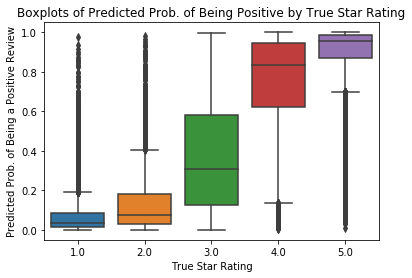

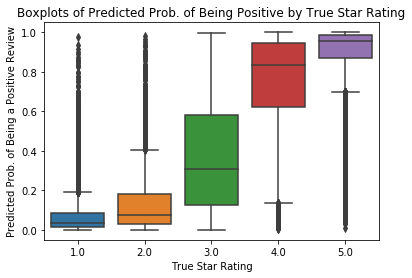

In [23]:
sns.boxplot(x = 'stars', y = 'prob_pos', data = results)
plt.title('Boxplots of Predicted Prob. of Being Positive by True Star Rating')
plt.xlabel('True Star Rating')
plt.ylabel('Predicted Prob. of Being a Positive Review')
plt.savefig('prob_pos_boxplot')